In [ ]:
import sympy
from sympy import S, Symbol, solve, Matrix, diff, plot, simplify, factor
from sympy import log as Log
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
from sympy.plotting import plot3d
from sympy.geometry import Point
%matplotlib inline

## Занятие 16
## Математический анализ
## Градиент функции нескольких переменных, производная по направлению, касательная плоскость.

    
### Задание 1
Найти градиент функции $z=x^2-xy-2y^2$ в произвольной точке и в точке М(1,2). Вычислить производную  в направлении, составляющем с положительным направлением оси ОХ угол 60 градусов, в точке М(1,2). 

In [ ]:
x, y = sympy.symbols('x y')
f = lambda x, y: x**2 - x*y - 2*y**2
grad_f = lambda f, *var: Matrix([f(*var).diff(variable) for variable in var])
grad_f(f, x, y)

Matrix([
[ 2*x - y],
[-x - 4*y]])

In [ ]:
grad_f_point = lambda f, var_dict: grad_f(f, *var_dict.keys()).subs(var_dict)
grad = grad_f_point(f, {x: 1, y: 2})
vect = (sympy.cos(Pi/3), sympy.sin(Pi/3))
display(grad, grad.dot(Matrix(vect)))

Matrix([
[ 0],
[-9]])

-9*sqrt(3)/2

###  Задание 2.
Поверхность задана уравнением $z = \frac{x^2}{2} - y^2$. Составить уравнение касательной плоскости и нормали в точке $М(2, -1, 1)$. Изобразить на графике.

In [ ]:
z = Symbol('z')
M = Point(2, -1, 1)
dictM = {x: M.x, y: M.y, z: M.z}
f = x**2 / 2 - y**2
fdx, fdy = [f.diff(p).subs(dictM) for p in [x, y]]
display(fdx, fdy)

2

2

In [ ]:
planeM = sympy.Eq(z - M.z, fdx*(x - M.x) + fdy*(y - M.y))
norm_line = sympy.Eq(sympy.Eq((x - M.x)/fdx, (y - M.y)/fdy, evaluate=False),
                     (z - M.z)/(-1), evaluate=False)
display(planeM, norm_line)

Eq(z - 1, 2*x + 2*y - 2)

Eq(Eq(x/2 - 1, y/2 + 1/2), 1 - z)

In [ ]:
new_z = solve(planeM, z)[0]
display(sympy.Eq(z, new_z))

Eq(z, 2*x + 2*y - 1)

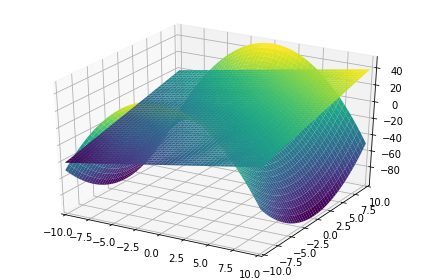

In [ ]:
plot3d(new_z, f)

###  Задание 3.
Поверхность задана уравнением $3xyz - z^3 = a^3$. Составить уравнение касательной плоскости и нормали к поверхности в точке $x = 0$, $y = a$. 

In [ ]:
a = Symbol('a')
M = Point(0, a, -a)
func = 3 * x * y * z - z ** 3 - a ** 3
dictM = {x: M.x, y: M.y, z: M.z}
Fdx, Fdy, Fdz = [func.diff(p).subs(dictM) for p in [x, y, z]]
display(Fdx, Fdy, Fdz)

-3*a**2

0

-3*a**2

In [ ]:
planeM = sympy.Eq(Fdx*(x - M.x) + Fdy*(y - M.y) + Fdz*(z - M.z), 0)
norm_line = sympy.Eq(sympy.Eq((x - M.x)/Fdx,(y - M.y)/Fdy, evaluate=False),
      (z - M.z)/Fdz, evaluate=False)
display(planeM, norm_line)

Eq(-3*a**2*x - 3*a**2*(a + z), 0)

Eq(Eq(-x/(3*a**2), zoo*(-a + y)), -(a + z)/(3*a**2))

### Индивидуальное задание.
Поверхность задана уравнением $x^2+16x+y^2+z^2=0$. Составить уравнение касательной плоскости и нормали в точке $(R\cos\alpha,R\sin\alpha,R)$.  Изобразить на графике при $R=-8$, $\alpha=1.64\pi$.

In [ ]:
a = sympy.Symbol('a')
fun = x ** 2 + 16 * x + y ** 2 + z ** 2
R = -8
alpha = 1.64 * Pi
M = Point(R * sympy.cos(alpha), R * sympy.sin(alpha), R)

In [ ]:
dictM = {x: M.x, y: M.y, z: M.z}
Fdx, Fdy, Fdz = [fun.diff(p).subs(dictM) for p in [x, y, z]]
display(Fdx, Fdy, Fdz)

16 - 16*cos(9*pi/25)

16*sin(9*pi/25)

-16

In [ ]:
planeM = sympy.Eq(Fdx*(x - M.x) + Fdy*(y - M.y) + Fdz*(z - M.z), 0)
norm_line = sympy.Eq(sympy.Eq((x - M.x)/Fdx,(y - M.y)/Fdy, evaluate=False),
                     (z - M.z)/Fdz, evaluate=False)
display(planeM, norm_line)

Eq(-16*z + (16 - 16*cos(9*pi/25))*(x + 8*cos(9*pi/25)) + 16*(y - 8*sin(9*pi/25))*sin(9*pi/25) - 128, 0)

Eq(Eq((x + 8*cos(9*pi/25))/(16 - 16*cos(9*pi/25)), (y - 8*sin(9*pi/25))/(16*sin(9*pi/25))), -z/16 - 1/2)

In [ ]:
new_z = solve(planeM, z)[0]
display(sympy.Eq(z, new_z))

Eq(z, -x*sin(7*pi/50) + x + y*cos(7*pi/50) - 16 + 8*sin(7*pi/50))

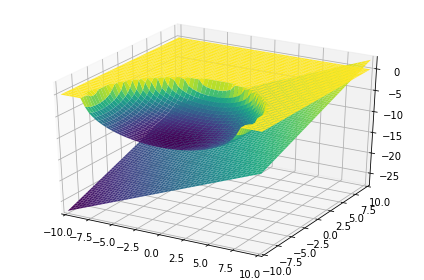

In [ ]:
plot3d(new_z, solve(fun, z)[0])